In [3]:
import albumentations as A
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import imgaug
import sklearn 
import joblib
import os
from glob import glob

In [4]:
def load_img(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image    

In [5]:
def comparison(actual_image, transformed_image, titles=None):
    if titles == None:
        titles = ['Actual Image', 'Transformed Image']
        
    fig, ax = plt.subplots(1, 2, figsize=(17, 17))
    ax[0].set_title(titles[0])
    if len(actual_image.shape) == 2:
        ax[0].imshow(actual_image, cmap='gray')
    else:
        ax[0].matshow(actual_image)
    ax[0].axis('off')

    ax[1].set_title(titles[1])
    if len(transformed_image.shape) == 2:
        ax[1].imshow(transformed_image, cmap='gray')
    else:
        ax[1].matshow(transformed_image)
    ax[1].axis('off')
    plt.show()

In [6]:
def save_al_img(file_name, path):
    A.save(file_name, path)

In [13]:
folder = os.listdir('image/')
imgs = glob('image/*/*.png')

for fd in folder:
    path = 'image/'+fd+'/*.png'
    image = glob(path) 
    for i in range(len(os.listdir('image/'+fd+'/'))):
        img = cv2.imread(image)
        plt.imshow(img)

TypeError: Can't convert object to 'str' for 'filename'

In [34]:
image = load_img('198701126_1.png')
image.shape
height = 150
width = 150

In [35]:
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose
)

In [36]:
train_transeforms = Compose([
        A.Resize(200,450),
        RandomRotate90(),
        Flip(),
        Transpose(),
        OneOf([
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
        ], p=0.2),
        OneOf([
            MotionBlur(p=0.2),
            MedianBlur(blur_limit=3, p=0.1),
            Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        OneOf([
            OpticalDistortion(p=0.3),
            GridDistortion(p=0.1),
            IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        OneOf([
            CLAHE(clip_limit=2),
            IAASharpen(),
            IAAEmboss(),
            RandomBrightnessContrast(),
        ], p=0.3),
        HueSaturationValue(p=0.3),
        OneOf([
            A.Resize(height=height, width=width),
            A.RandomResizedCrop(height=height, width=width, scale=(0.3, 1.0)),
        ]),

        OneOf([
            A.CoarseDropout(always_apply=False, p=0.5, max_holes=20, max_height=15, max_width=15, min_holes=1, min_height=8, min_width=8)
        ], p=0.2),
        OneOf([
            A.ElasticTransform(always_apply=False, p=0.5, alpha=0.20000000298023224, sigma=3.359999895095825, alpha_affine=2.009999990463257, interpolation=1, border_mode=1, value=(0, 0, 0), mask_value=None, approximate=False)
        ], p = 0.3),
        OneOf([
            HorizontalFlip(always_apply= False, p=0.5)

        ],p=0.2)
    ], p= 1.0)
                

c:\Users\hsj\anaconda3\envs\bgrm\lib\site-packages\albumentations\imgaug\transforms.py:261: FutureWarning: IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead
  warnings.warn("IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead", FutureWarning)
c:\Users\hsj\anaconda3\envs\bgrm\lib\site-packages\albumentations\imgaug\transforms.py:299: FutureWarning: This IAAPiecewiseAffine is deprecated. Please use PiecewiseAffine instead
  warnings.warn("This IAAPiecewiseAffine is deprecated. Please use PiecewiseAffine instead", FutureWarning)
c:\Users\hsj\anaconda3\envs\bgrm\lib\site-packages\albumentations\imgaug\transforms.py:231: FutureWarning: IAASharpen is deprecated. Please use Sharpen instead
  warnings.warn("IAASharpen is deprecated. Please use Sharpen instead", FutureWarning)
c:\Users\hsj\anaconda3\envs\bgrm\lib\site-packages\albumentations\imgaug\transforms.py:174: FutureWarning: This augmentation is deprecated. Please use Emboss instead
  warnings.warn("

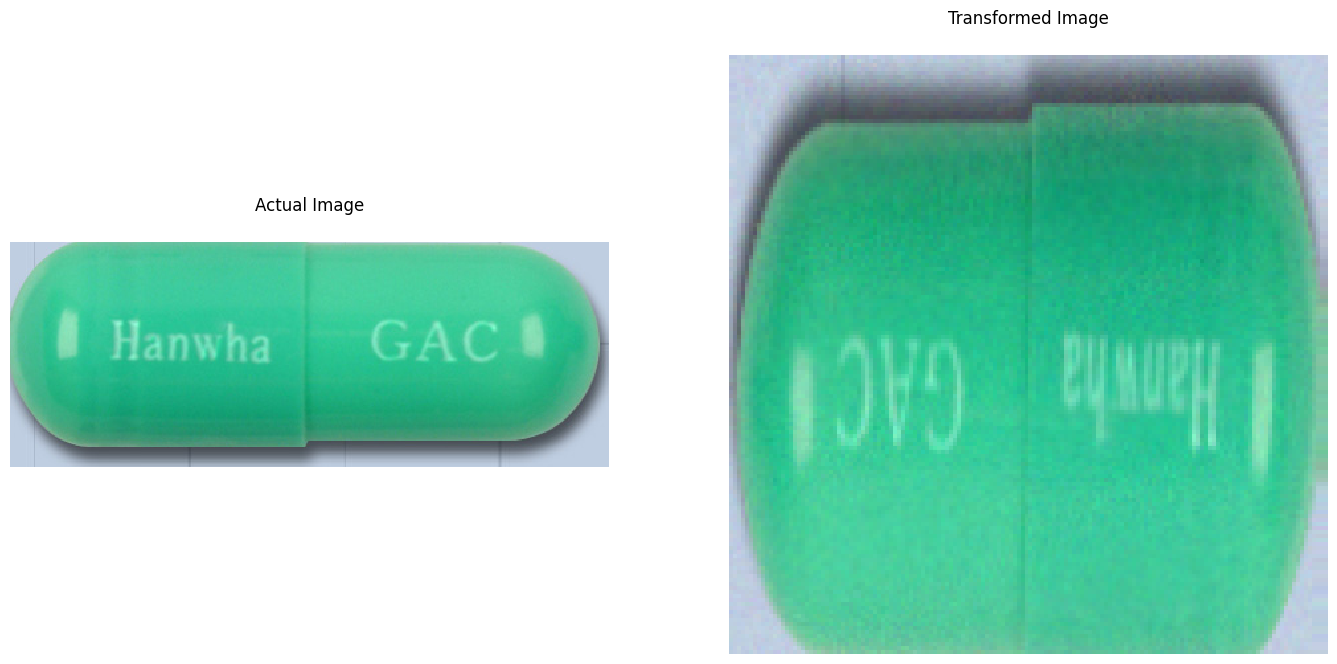

In [37]:
transformed_img = train_transeforms(image= image)['image']
comparison(image, transformed_img)